In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/ALL PROJECTS/SEM 6/INTERNSHIP-DRDO-SEM6


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ALL PROJECTS/SEM 6/INTERNSHIP-DRDO-SEM6


In [5]:
import warnings
warnings.filterwarnings("ignore")
!pip3 install gTTS


In [6]:
#---------------------------------------------To CREATE A CSV FILE OF WAVES DATA-----------------------------------------------------
import csv
import pandas as pd
import numpy as np
import math
import random
import os.path
from scipy import signal


wave_names ={1:'SINE',2:'COSINE',3:'SQUARE',4:'RAMP'}

def noisy_wave(steps_per_cycle = 50,number_of_cycles = 500,random_factor = 0.4,wave_number=1):
    '''
    random_factor    : amont of noise in sign wave. 0 = no noise
    number_of_cycles : The number of steps required for one cycle
    Return : 
    pd.DataFrame() with column sin_t containing the generated sin wave 
    '''
    random.seed(0)
    #print(wave_number)
    if wave_number == 1:
      df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
      df["wave_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
      df["wave_t_clean"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)))
    elif wave_number == 2:
      df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
      df["wave_t"] = df.t.apply(lambda x: math.cos(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
      df["wave_t_clean"] = df.t.apply(lambda x: math.cos(x * (2 * math.pi / steps_per_cycle)))

    elif wave_number == 3:
      df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
      df["wave_t"] = df.t.apply(lambda x: signal.square(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-0.01, +0.01) * random_factor,duty=0.6))
      df["wave_t_clean"] = df.t.apply(lambda x: signal.square(x * (2 * math.pi / steps_per_cycle),duty=0.6))
    else:
      df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
      df["wave_t"] = df.t.apply(lambda x: signal.sawtooth(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-0.1, +0.1) * random_factor))
      df["wave_t_clean"] = df.t.apply(lambda x: signal.sawtooth(x * (2 * math.pi / steps_per_cycle)))
      
    #print("create period-{} {} wave with {} cycles".format(steps_per_cycle,wave_names[wave_number],number_of_cycles))
    #print("In total, the sin wave time series length is {}".format(steps_per_cycle*number_of_cycles+1))
    return(df)
def _load_data(data, n_prev = 100):  
      """
      data should be pd.DataFrame()
      """

      docX, docY = [], []
      for i in range(len(data)-n_prev):
          docX.append(data.iloc[i:i+n_prev].as_matrix())
          docY.append(data.iloc[i+n_prev].as_matrix())
      alsX = np.array(docX)
      alsY = np.array(docY)

      return alsX, alsY

def load_to_csv(df,label,count):
    length_of_sequences = 2
    test_size = 1.0
    ntr = int(len(df) * (1 - test_size))
    df_train = df[["wave_t"]].iloc[:ntr]
    df_test  = df[["wave_t"]].iloc[ntr:]
    (X_train, y_train) = _load_data(df_train, n_prev = length_of_sequences)
    (X_test, y_test)   = _load_data(df_test, n_prev = length_of_sequences)  
    #print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    #print(X_train,y_train)
    #print(len(y_test))
    #print("\n\n\n\n")
    #print(y_test)
    h=list()
    h.append("Id")
    for i in range(1,11):
      h.append("x"+str(i))
    #print(h)
    h.append("class_label")
    #row = ['Id', 'x1','x2','x3','x4','x5', 'class_label']
    
    with open('wave_data_points.csv', 'a') as csvFile:
        writer = csv.writer(csvFile)
        if(label=="sine"):  
          writer.writerow(h)
        for j in range(0,500):
          k=list()
          for i in range(1,11):
            if i==1:
              k.append(count)
              count = count+1
           
            s =""+str(y_test[i+j][0]) 
            k.append(s)
          k.append(label)
          writer.writerow(k)
    csvFile.close()
    
    
file_path ="wave_data_points.csv"
if(not(os.path.exists(file_path))):
  print("Creating a csv file : wave_data_points.csv\n")
  steps_per_cycle = 10
  df = noisy_wave(steps_per_cycle=steps_per_cycle,
                random_factor = 0,wave_number=1)
  print('Writing datapoints of sine wave')
  load_to_csv(df,"sine",1)
  df = noisy_wave(steps_per_cycle=steps_per_cycle,
                random_factor = 0,wave_number=3)
  print('Writing datapoints of square wave')
  load_to_csv(df,"square",501)
  df = noisy_wave(steps_per_cycle=steps_per_cycle,
                random_factor = 0,wave_number=4)
  print('Writing datapoints of ramp wave')
  load_to_csv(df,"ramp",1001)
  df = noisy_wave(steps_per_cycle=steps_per_cycle,
                random_factor = 0,wave_number=2)
  print('Writing datapoints of cosine wave')
  load_to_csv(df,"cosine",1501)      


Creating a csv file : wave_data_points.csv

Writing datapoints of sine wave
Writing datapoints of square wave
Writing datapoints of ramp wave
Writing datapoints of cosine wave


Using TensorFlow backend.


						WAVES DATA POINTS AND LABEL PREDICTION
------------------------------------------------------------------------------------------------------------------------------------------------------


	MENU
1.GENERATE RANDOM WAVE
2.CHOOSE WAVE

Enter the choice 2


	CHOOSE WAVE
1.SINE WAVE
2.COSINE WAVE
3.SQUARE WAVE
4.RAMP WAVE

Enter the choice 4
4

create period-10 RAMP wave with 500 cycles
In total, the sin wave time series length is 5001

 Training Set	 Testing Set
(3748, 2, 1) (3748, 1) (1249, 2, 1) (1249, 1)




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2, 1)              0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         

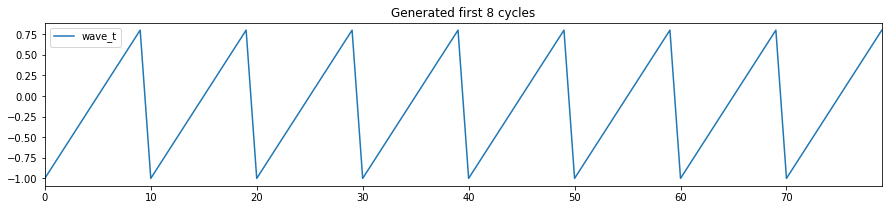

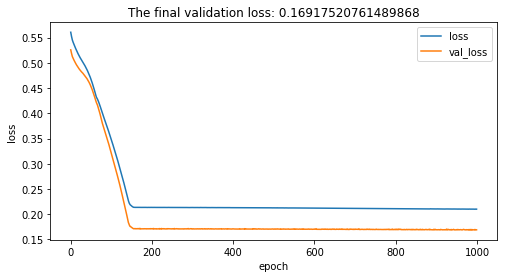

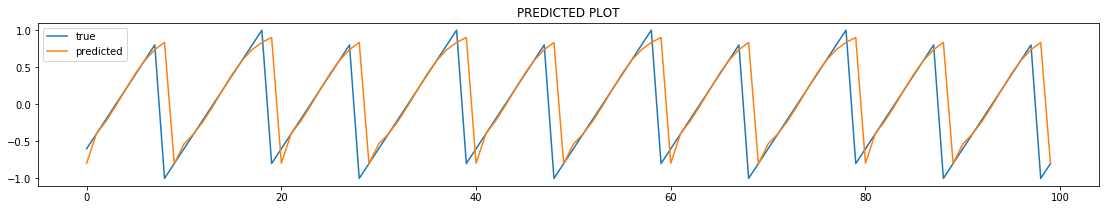

WEIGHTS AFTER MODEL.FIT():
input_1	[]
RNN	[array([[1.1009923]], dtype=float32), array([[-0.8213588]], dtype=float32), array([-0.967887], dtype=float32)]
dense	[array([[1.4585541]], dtype=float32), array([0.6062136], dtype=float32)]


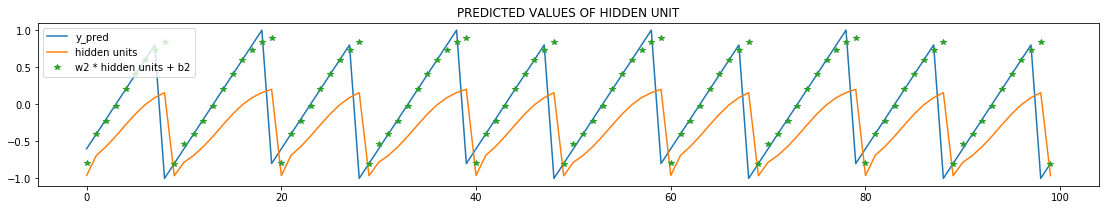

initial value of sin x_0 = [1.], h_0 = 0
validation loss 0.31490
All RAMP estimates agree with ones from Keras = True

All hidden state estmiates agree with ones fome Keras = True
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (1, 1, 1)                 0         
_________________________________________________________________
RNN (SimpleRNN)              (1, 1)                    3         
_________________________________________________________________
dense (Dense)                (1, 1)                    2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
All predicted RAMP values with stateful model agree to xstars = True





Accuracy: 1.0

Classification Report
               precision    recall  f1-score   support

        sine       1.00      1.00      1.00     

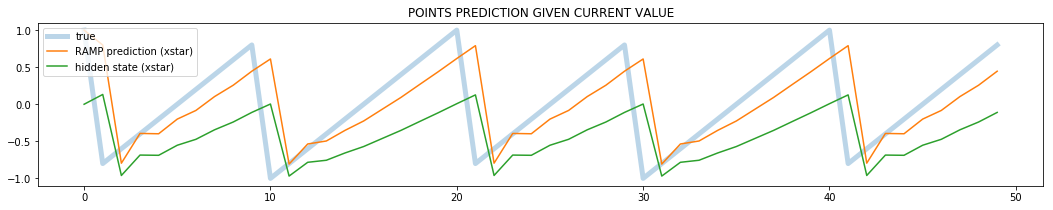

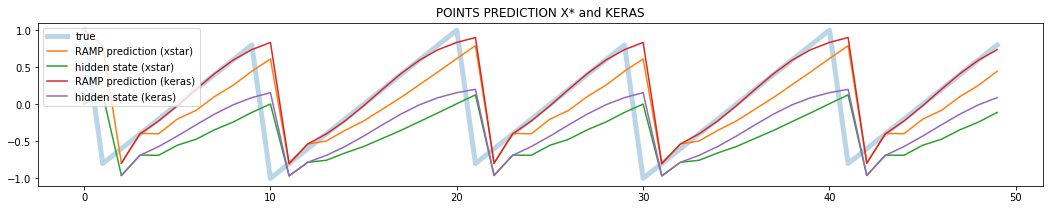

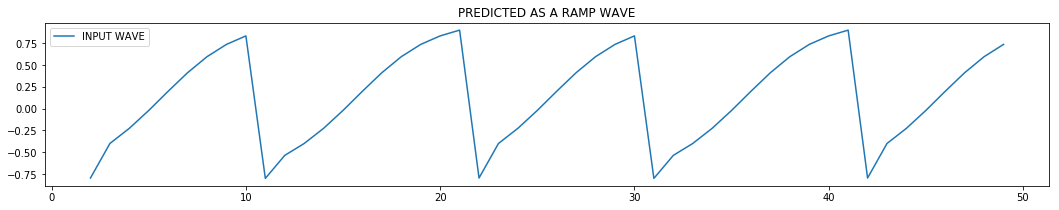

In [7]:
import random
import sys
import tensorflow
import keras
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dense, Activation 
from keras.layers.recurrent import SimpleRNN
import warnings
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from subprocess import check_output
from gtts import gTTS 
import os 
from IPython.display import Audio
import time

wave_names ={1:'SINE',2:'COSINE',3:'SQUARE',4:'RAMP'}
def play_output_audio(label):
 
  mytext = 'The wave is predicted as a '+label+' wave.' 
  language = 'en'
  myobj = gTTS(text=mytext, lang=language, slow=False) 
  myobj.save("predicted_audio.mp3")
 

def predict_label(y):
    dataset = pd.read_csv("wave_data_points.csv")
    dataset = dataset.drop('Id', 1)

    array = dataset.values
    X = array[:,0:10]
    Y = array[:,10]
    print("\n\n\n\n")
    validation_size = 0.30
    seed = 0
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, Y_train)
 
    Y_predict = knn.predict(X_validation)
    #print(X_validation)
    print("Accuracy: %s\n" % accuracy_score(Y_validation, Y_predict)) 
    print("Classification Report\n %s \n" % classification_report(Y_validation, Y_predict, labels=["sine", "square", "ramp", "cosine"]))
    lab={}
    k=11
    p=[]
    for i in range(21,len(y),10):
      p=y[k:i]
      #print(len(p[0]))
      pl=knn.predict([p])
      #print(pl)
      k=k+10
      if pl[0] not in lab:
        lab[pl[0]] = 0
      else: 
        lab[pl[0]] += 1


    #print("\n\n\nThe prediction: %s"%(prediction[0].upper()))
    print(lab)
    listofTuples = sorted(lab.items() , reverse=True, key=lambda x: x[1])
    predicted_label = listofTuples[0]
    print("max predicted labels from 500 cycles"+predicted_label[0])

    plt.figure(figsize=(18,3))
    #plt.text(3,0,predicted_label[0])
    plt.title("PREDICTED AS A "+predicted_label[0].upper()+" WAVE")

    plt.plot(y[:50],label="INPUT WAVE")
    plt.legend()

    play_output_audio(predicted_label[0])



def noisy_wave(steps_per_cycle = 50,number_of_cycles = 500,random_factor = 0.4,wave_number=1):
    '''
    random_factor    : amont of noise in sign wave. 0 = no noise
    number_of_cycles : The number of steps required for one cycle
    Return : 
    pd.DataFrame() with column sin_t containing the generated sin wave 
    '''
    random.seed(0)
    print(wave_number)
    if wave_number == 1:
      df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
      df["wave_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
      df["wave_t_clean"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)))
    elif wave_number == 2:
      df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
      df["wave_t"] = df.t.apply(lambda x: math.cos(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
      df["wave_t_clean"] = df.t.apply(lambda x: math.cos(x * (2 * math.pi / steps_per_cycle)))

    elif wave_number == 3:
      df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
      df["wave_t"] = df.t.apply(lambda x: signal.square(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-0.01, +0.01) * random_factor,duty=0.6))
      df["wave_t_clean"] = df.t.apply(lambda x: signal.square(x * (2 * math.pi / steps_per_cycle),duty=0.6))
    else:
      df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
      df["wave_t"] = df.t.apply(lambda x: signal.sawtooth(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-0.1, +0.1) * random_factor))
      df["wave_t_clean"] = df.t.apply(lambda x: signal.sawtooth(x * (2 * math.pi / steps_per_cycle)))
      
    print("\ncreate period-{} {} wave with {} cycles".format(steps_per_cycle,wave_names[wave_number],number_of_cycles))
    print("In total, the sin wave time series length is {}".format(steps_per_cycle*number_of_cycles+1))
    return(df)

def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY


def define_model(length_of_sequences, wave_number, batch_size = None, stateful = False):
    in_out_neurons = 1
    hidden_neurons = 1
    if wave_number == 1:
      l="mean_squared_error"
    elif wave_number == 2:
      l="mean_squared_error"
    elif wave_number == 2:
      l="mean_absolute_percentage_error"
    else:
      l="mean_absolute_error"  
    inp = Input(batch_shape=(batch_size, length_of_sequences, in_out_neurons))  
    rnn = SimpleRNN(hidden_neurons, return_sequences=False,stateful = stateful,name="RNN")(inp)
    dens = Dense(in_out_neurons,name="dense")(rnn)
    model = Model(inputs=[inp],outputs=[dens])    
    model.compile(loss=l, optimizer="rmsprop")
    return(model,(inp,rnn,dens))

def RNNmodel(ws,x,h=0):
    '''
    ws: predicted weights 
    x : scalar current sign value
    h : scalar RNN hidden unit 
    '''
           
    h = np.tanh(x*ws["RNN"][0][0][0] + h*ws["RNN"][1][0][0] + ws["RNN"][2][0])
    x = h*ws["dense"][0][0][0] + ws["dense"][1][0]
    
    return(x,h)


def myRNNpredict(ws,X):
    X = X.flatten()
    h = 0
    for i in range(len(X)):
        x,h = RNNmodel(ws,X[i],h)
    return(x,h)

def startexec(wave_no):
  steps_per_cycle = 10
  df = noisy_wave(steps_per_cycle=steps_per_cycle,random_factor = 0,wave_number=wave_no)
  n_plot = 8
  df[["wave_t"]].head(steps_per_cycle * n_plot).plot(title="Generated first {} cycles".format(n_plot),figsize=(15,3))


  length_of_sequences = 2
  test_size = 0.25
  ntr = int(len(df) * (1 - test_size))
  df_train = df[["wave_t"]].iloc[:ntr]
  df_test  = df[["wave_t"]].iloc[ntr:]
  (X_train, y_train) = _load_data(df_train, n_prev = length_of_sequences)
  (X_test, y_test)   = _load_data(df_test, n_prev = length_of_sequences)
  print('\n Training Set\t Testing Set')  
  print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

  model, (inp,rnn,dens) = define_model(length_of_sequences = X_train.shape[1],wave_number=wave_no)
  model.summary()
  #print(model.get_weights())
  print('DEFAULT WEIGHTS:')
  ws1 = {}
  for layer in model.layers:
      ws1[layer.name] = layer.get_weights()
      print(layer.name+'\t',end='')
      print(layer.get_weights())
  #print(ws1)
  choice=input("Do you want to set the weights????\t\t [y/n] ")
  if(choice == "y"):
    list_of_weights=[]
    for i in range(0,5):
      list_of_weights.append(input('W'+str(i+1)+':'))
      
    rnn_layer_weights=[]
    rnn_layer_weights.append(np.array([[list_of_weights[0]]]))
    rnn_layer_weights.append(np.array([[list_of_weights[1]]]))
    rnn_layer_weights.append(np.array([list_of_weights[2]]))
    dense_layer_weights=[]
    dense_layer_weights.append(np.array([[list_of_weights[3]]]))
    dense_layer_weights.append(np.array([list_of_weights[4]]))
    for layer in model.layers:
      if(layer.name == 'RNN'):
        layer.set_weights(rnn_layer_weights)
      if(layer.name == 'dense'):
        layer.set_weights(dense_layer_weights)

    print('MANUAL WEIGHTS:\n')
    ws2 = {}
    for layer in model.layers:
        ws2[layer.name] = layer.get_weights()
        print(layer.name+'\t',end='')
        print(layer.get_weights())
    #print(ws2)
    

  
  if wave_no == 1 or wave_no == 2:
    b_s=600
    v_s=0.05
  elif wave_no == 3:
    b_s=400
    v_s=0.07
  else:
    b_s=400
    v_s=0.01
    

  hist = model.fit(X_train, y_train, batch_size=b_s, epochs=1000, 
                 verbose=False,validation_split=v_s)
  
  plt.figure(figsize=(8,4))
  for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)

  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.title("The final validation loss: {}".format(hist.history["val_loss"][-1]))
  plt.legend()
  plt.show()
  
  y_pred = model.predict(X_test)
  plt.figure(figsize=(19,3))
  plt.title("PREDICTED PLOT")
  plt.plot(y_test[:100],label="true")
  plt.plot(y_pred[:100],label="predicted")
  plt.legend()
  plt.show()

  print('WEIGHTS AFTER MODEL.FIT():')
  ws = {}
  for layer in model.layers:
      ws[layer.name] = layer.get_weights()
      print(layer.name+'\t',end='')
      print(layer.get_weights())
  #print(ws)
  rnn_model = Model(inputs=[inp],outputs=[rnn])
  rnn_model.compile(loss="mean_squared_error", optimizer="rmsprop")
  hidden_units = rnn_model.predict(X_test).flatten()
  upto = 100
  predicted_wave = ws["dense"][0][0][0]*hidden_units + ws["dense"][1][0]
  plt.figure(figsize=(19,3))
  plt.title("PREDICTED VALUES OF HIDDEN UNIT")
  plt.plot(y_test[:upto],label="y_pred")
  plt.plot(hidden_units[:upto],label="hidden units")
  plt.plot(predicted_wave[:upto],"*",
          label="w2 * hidden units + b2")
  plt.legend()
  plt.show()


  upto = 50 ## predict the first  sin values
  xstars, hs_hand = [], []
  for i, x in enumerate(df_test.values):
      if i == 0:
          h = 0 ## initial hidden layer value is zero
          xstar = x
          print("initial value of sin x_0 = {}, h_0 = {}".format(x,h))
      hs_hand.append(h)
      xstars.append(xstar[0])
      xstar, h = RNNmodel(ws,x, h)

  assert len(df_test.values) == len(xstars)
  plt.figure(figsize=(18,3))
  plt.title("POINTS PREDICTION GIVEN CURRENT VALUE")
  plt.plot(df_test.values[:upto],label="true",alpha=0.3,linewidth=5)
  plt.plot(xstars[:upto],label=wave_names[wave_no]+" prediction (xstar)")
  plt.plot(hs_hand[:upto],label="hidden state (xstar)")
  plt.legend()
  "validation loss {:3.2f}".format(np.mean((np.array(xstars) - df_test["wave_t"].values)**2))
  y_test_from_keras = model.predict(X_test).flatten()
  np.all(predicted_wave == y_test_from_keras)
  y_test_from_keras = [np.NaN, np.NaN] + list(y_test_from_keras.flatten())
  h_test_from_keras = [np.NaN, np.NaN] + list(hidden_units.flatten())

  plt.figure(figsize=(18,3))
  plt.title("POINTS PREDICTION X* and KERAS")
  plt.plot(df_test.values[:upto],label="true",alpha=0.3,linewidth=5)
  plt.plot(xstars[:upto],label=wave_names[wave_no]+" prediction (xstar)")
  plt.plot(hs_hand[:upto],label="hidden state (xstar)")
  plt.plot(y_test_from_keras[:upto],label=wave_names[wave_no]+" prediction (keras)")
  plt.plot(h_test_from_keras[:upto],label="hidden state (keras)")
  plt.legend()

  print("validation loss {:6.5f}".format(np.nanmean((np.array(y_test_from_keras) - df_test["wave_t"].values)**2)))

  xs, hs = [], []
  for i in range(X_test.shape[0]):
      x, h = myRNNpredict(ws,X_test[i,:,:])
      xs.append(x)
      hs.append(h)


  print("All {} estimates agree with ones from Keras = {}".format(wave_names[wave_no],
    np.all(np.abs( np.array(xs) - np.array(y_test_from_keras[2:]) ) < 1E-5)))

  print("\nAll hidden state estmiates agree with ones fome Keras = {}".format(
      np.all(np.abs( np.array(hs) - np.array(h_test_from_keras[2:]) ) < 1E-5)) )
  
  model_stateful,_ = define_model(length_of_sequences = 1, 
                                batch_size=1, 
                                stateful = True,wave_number=wave_no)
  model_stateful.summary()

  for layer in model.layers:        
    for layer_predict in model_stateful.layers:
        if (layer_predict.name == layer.name):
            layer_predict.set_weights(layer.get_weights())
            break
  pred = df_test.values[0][0]
  stateful_wave = []
  model_stateful.reset_states()
  for i in range(df_test.shape[0]):
      stateful_wave.append(pred)
      pred = model_stateful.predict(df_test.values[i].reshape(1,1,1))[0][0]
      
  stateful_wave = np.array(stateful_wave)
  print("All predicted {} values with stateful model agree to xstars = {}".format(wave_names[wave_no],
    np.all(np.abs(np.array(stateful_wave) - np.array(xstars))< 1E-5)))
  #print(y_test_from_keras[:upto])

  predict_label(y_test_from_keras)

  









def main():
  print('\033[1m' + '\t\t'*3+'WAVES DATA POINTS AND LABEL PREDICTION\n'+ '-'*150  + '\033[0m')
  print('\033[1m' + '\n\n\tMENU\n1.GENERATE RANDOM WAVE\n2.CHOOSE WAVE\n' + '\033[0m')
  ch1 = int(input('Enter the choice '))
  w_no=0
  if ch1==1:
    w_no = random.choice([1,2,3,4])
  else:
    print('\033[1m' + '\n\n\tCHOOSE WAVE\n1.SINE WAVE\n2.COSINE WAVE\n3.SQUARE WAVE\n4.RAMP WAVE\n' + '\033[0m')
    ch2 = int(input('Enter the choice '))
    w_no = ch2
  startexec(w_no)
  
if __name__ == "__main__":
  main()

In [0]:
from IPython.display import Audio
Audio('predicted_audio.mp3',autoplay=True)

In [0]:
import numpy

modules = list(set(sys.modules) & set(globals()))
for module_name in modules:
    module = sys.modules[module_name]
    print (module_name, getattr(module, '__version__', 'unknown'))

warnings unknown
sys unknown
time unknown
numpy 1.16.4
signal unknown
csv 1.0
math unknown
tensorflow 1.14.0
random unknown
os unknown
keras 2.2.4


In [0]:
import numpy as np
rnn=[]
w1=np.array([[-0.7621]])
w2=np.array([[-1]])
b=np.array([0])
rnn.append(w1)
rnn.append(w2)
rnn.append(b)
print(l)

NameError: ignored